In [3]:
import tensorflow as tf
import os
import numpy as np
import shutil
import zipfile
import matplotlib.pyplot as plt
import gdown
from google.colab import files
from keras.preprocessing import image

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# **Download and extracting the dataset**

In [5]:

dataset = 'https://drive.google.com/uc?id=1TEAQ2N_ANLTR36-gZ6QsbB7nAtUpqoMS'
output = 'dataset_split.zip'
gdown.download(dataset, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1TEAQ2N_ANLTR36-gZ6QsbB7nAtUpqoMS
From (redirected): https://drive.google.com/uc?id=1TEAQ2N_ANLTR36-gZ6QsbB7nAtUpqoMS&confirm=t&uuid=1028b46f-20c2-4626-be6c-15592a22e830
To: /content/dataset_split.zip
100%|██████████| 362M/362M [00:02<00:00, 139MB/s] 


'dataset_split.zip'

In [6]:
base_dir = os.getcwd()
zip_file = os.path.join(base_dir, 'dataset_split.zip')

# Extract the zip file
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(base_dir)

In [7]:
dataset_split_dir = os.path.join(base_dir, 'dataset_split')
train_dir = os.path.join(dataset_split_dir, 'train')
valid_dir = os.path.join(dataset_split_dir, 'valid')
test_dir = os.path.join(dataset_split_dir, 'test')

# **Setting Training, Validaton, and Testing Data**

In [8]:
#Train, Validation and test Data
img_height, img_width = 64, 64
batch_size = 100
Train = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
Valid = ImageDataGenerator( rescale = 1.0/255. )
Test = ImageDataGenerator( rescale = 1.0/255. )
train_data = Train.flow_from_directory(train_dir,
                                         target_size = (img_height, img_width),
                                         batch_size = batch_size,
                                         class_mode = 'categorical'
                                         )
valid_data = Valid.flow_from_directory(valid_dir,
                                        target_size = (img_height, img_width),
                                        batch_size = batch_size,
                                        class_mode = 'categorical'
                                        )
test_data = Test.flow_from_directory(test_dir,
                                            target_size = (img_height, img_width),
                                            batch_size = batch_size,
                                            class_mode = 'categorical'
                                            )

Found 3200 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


# **Defining the Model**

In [9]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), input_shape=(64, 64, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      #Dropout(0.5, seed=123),
      tf.keras.layers.Dense(512, activation='relu'),
      #Dropout(0.6, seed=123),
    tf.keras.layers.Dense(4, activation='softmax')
])

In [10]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

*Below is the modified-given model which was not used but can still be compiled using the same optimizer but a different loss function (Was Sparse Categorical Cross Entropy);*

In [17]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(4)
    ]
)

In [ ]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)

# **Training the Model**

In [11]:
history = model.fit(
    train_data,
    validation_data = valid_data,
    epochs = 30 #15
)

Epoch 1/30
32/32 [==============================] - 28s 755ms/step - loss: 1.2911 - accuracy: 0.3756 - val_loss: 1.1086 - val_accuracy: 0.5233
Epoch 2/30
32/32 [==============================] - 24s 750ms/step - loss: 0.9064 - accuracy: 0.6338 - val_loss: 0.6899 - val_accuracy: 0.7017
Epoch 3/30
32/32 [==============================] - 23s 742ms/step - loss: 0.6763 - accuracy: 0.7306 - val_loss: 0.7546 - val_accuracy: 0.7100
Epoch 4/30
32/32 [==============================] - 26s 811ms/step - loss: 0.5949 - accuracy: 0.7781 - val_loss: 0.4911 - val_accuracy: 0.8217
Epoch 5/30
32/32 [==============================] - 24s 747ms/step - loss: 0.4950 - accuracy: 0.8191 - val_loss: 0.4453 - val_accuracy: 0.8317
Epoch 6/30
32/32 [==============================] - 24s 756ms/step - loss: 0.4200 - accuracy: 0.8353 - val_loss: 0.4224 - val_accuracy: 0.8167
Epoch 7/30
32/32 [==============================] - 23s 729ms/step - loss: 0.3819 - accuracy: 0.8612 - val_loss: 0.3751 - val_accuracy: 0.8617

# **Visualizing Accuracy and Loss Over Time**

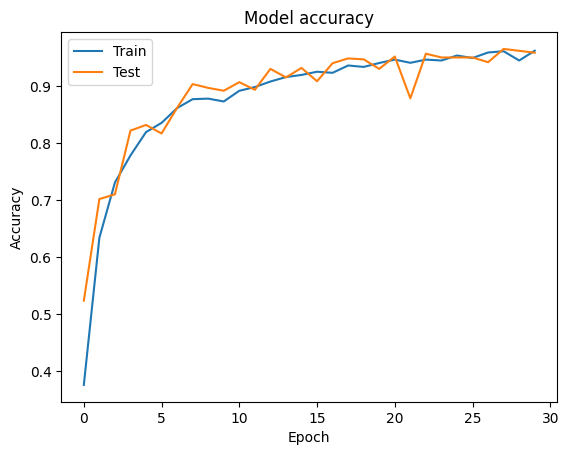

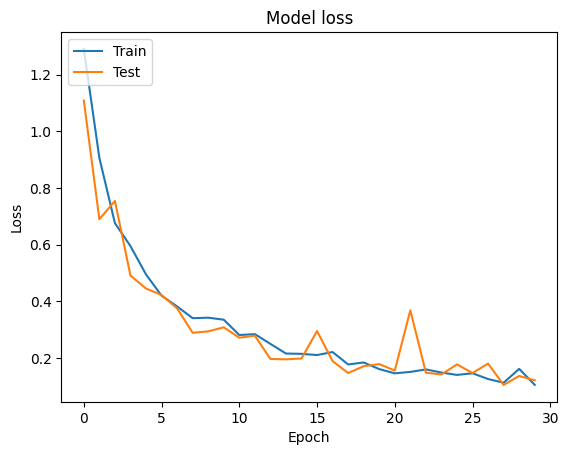

In [13]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# **Evaluating the Model**

In [15]:
model.evaluate(test_data)

2/2 [==============================] - 1s 409ms/step - loss: 0.1630 - accuracy: 0.9600


[0.16302217543125153, 0.9599999785423279]

# **Test the Model with uploaded photos**

In [ ]:
Classes = ['Apple', 'Banana', 'Lemon', 'Orange']


# Upload the image
uploaded = files.upload()

# Get the filename
filename = next(iter(uploaded))

# Load the image
img = image.load_img(filename, target_size=(64, 64))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add an extra dimension to the array
img_array_expanded = np.expand_dims(img_array, axis=0)

# Normalize the data
img_array_expanded /= 255.

# Use the model to make a prediction
prediction = model.predict(img_array_expanded)

# Get the class with the highest probability
predicted_class = np.argmax(prediction)

confidence_level = np.max(prediction)

# Print the predicted class and the confidence level
print("Predicted class: ", Classes[predicted_class])
print("Confidence level: ", confidence_level*100, "%")

Saving LEMON_-_CITRUS_LIMON__33129.webp to LEMON_-_CITRUS_LIMON__33129.webp
1/1 [==============================] - 0s 385ms/step
Predicted class:  Lemon
Confidence level:  99.90777969360352 %


# **Saving the Model and Converting to Tflite**

In [16]:
model.save('Lemon-Model.h5')
files.download('Lemon-Model.h5')
print("Model saved")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model saved


In [17]:
model.save('Lemon-Model.keras')
files.download('Lemon-Model.keras')
print("Model saved")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Model saved


In [20]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("Lemon-Model.tflite", 'wb') as f:
  f.write(tflite_model)
files.download('Lemon-Model.tflite')
print("Tflite Downloaded")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Tflite Downloaded
